# Analisi dati per la Velocità della Luce 

Questo file contiene l'analisi dati dell'esperimento svolto in laboratorio seguendo l'esperimento di Friazou/Focault

## Import

### Import delle librerie

In [1]:
from typing import Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import scienceplots
from colorama import Fore, Style

plt.style.use(["science", "ieee"])

### Import dei dati

In [2]:
# dati preliminari # * copiati da excel
D = 13.27  # m
a = 0.474  # m
f2 = 0.252  # m

D_err = 0.0142  # m
a_err = 0.001  # m
f2_err = 0  # m

# dati delle misure
f_name = "Dati_Grezzi.xlsx"
set_names = (
    "CW",
    "CCW",
    "CWmax",
    "CCWmax",
    "CWCCW",
    # "CCWCW"
)

data_dict = dict()
for _set in set_names:
    data_dict[_set] = pd.read_excel(f_name, sheet_name=f"Exp_{_set}", header=None)
    data_dict[_set] = data_dict[_set][(data_dict[_set].T != 0).any()].T.to_numpy()

In [3]:
# remove unused variable
del f_name, set_names

## Formule statistiche

In [4]:
def weighted_avg_and_std(values: np.ndarray, errors: np.ndarray) -> Tuple[float]:
    # Return the weighted average and standard deviation.
    weights = 1 / np.square(errors)
    average = sum(values * weights) / sum(weights)
    sigma = 1 / np.sqrt(sum(weights))
    return (average, sigma)

## Inserire un grafico delle misure per controllare che non ci siano valori anomali

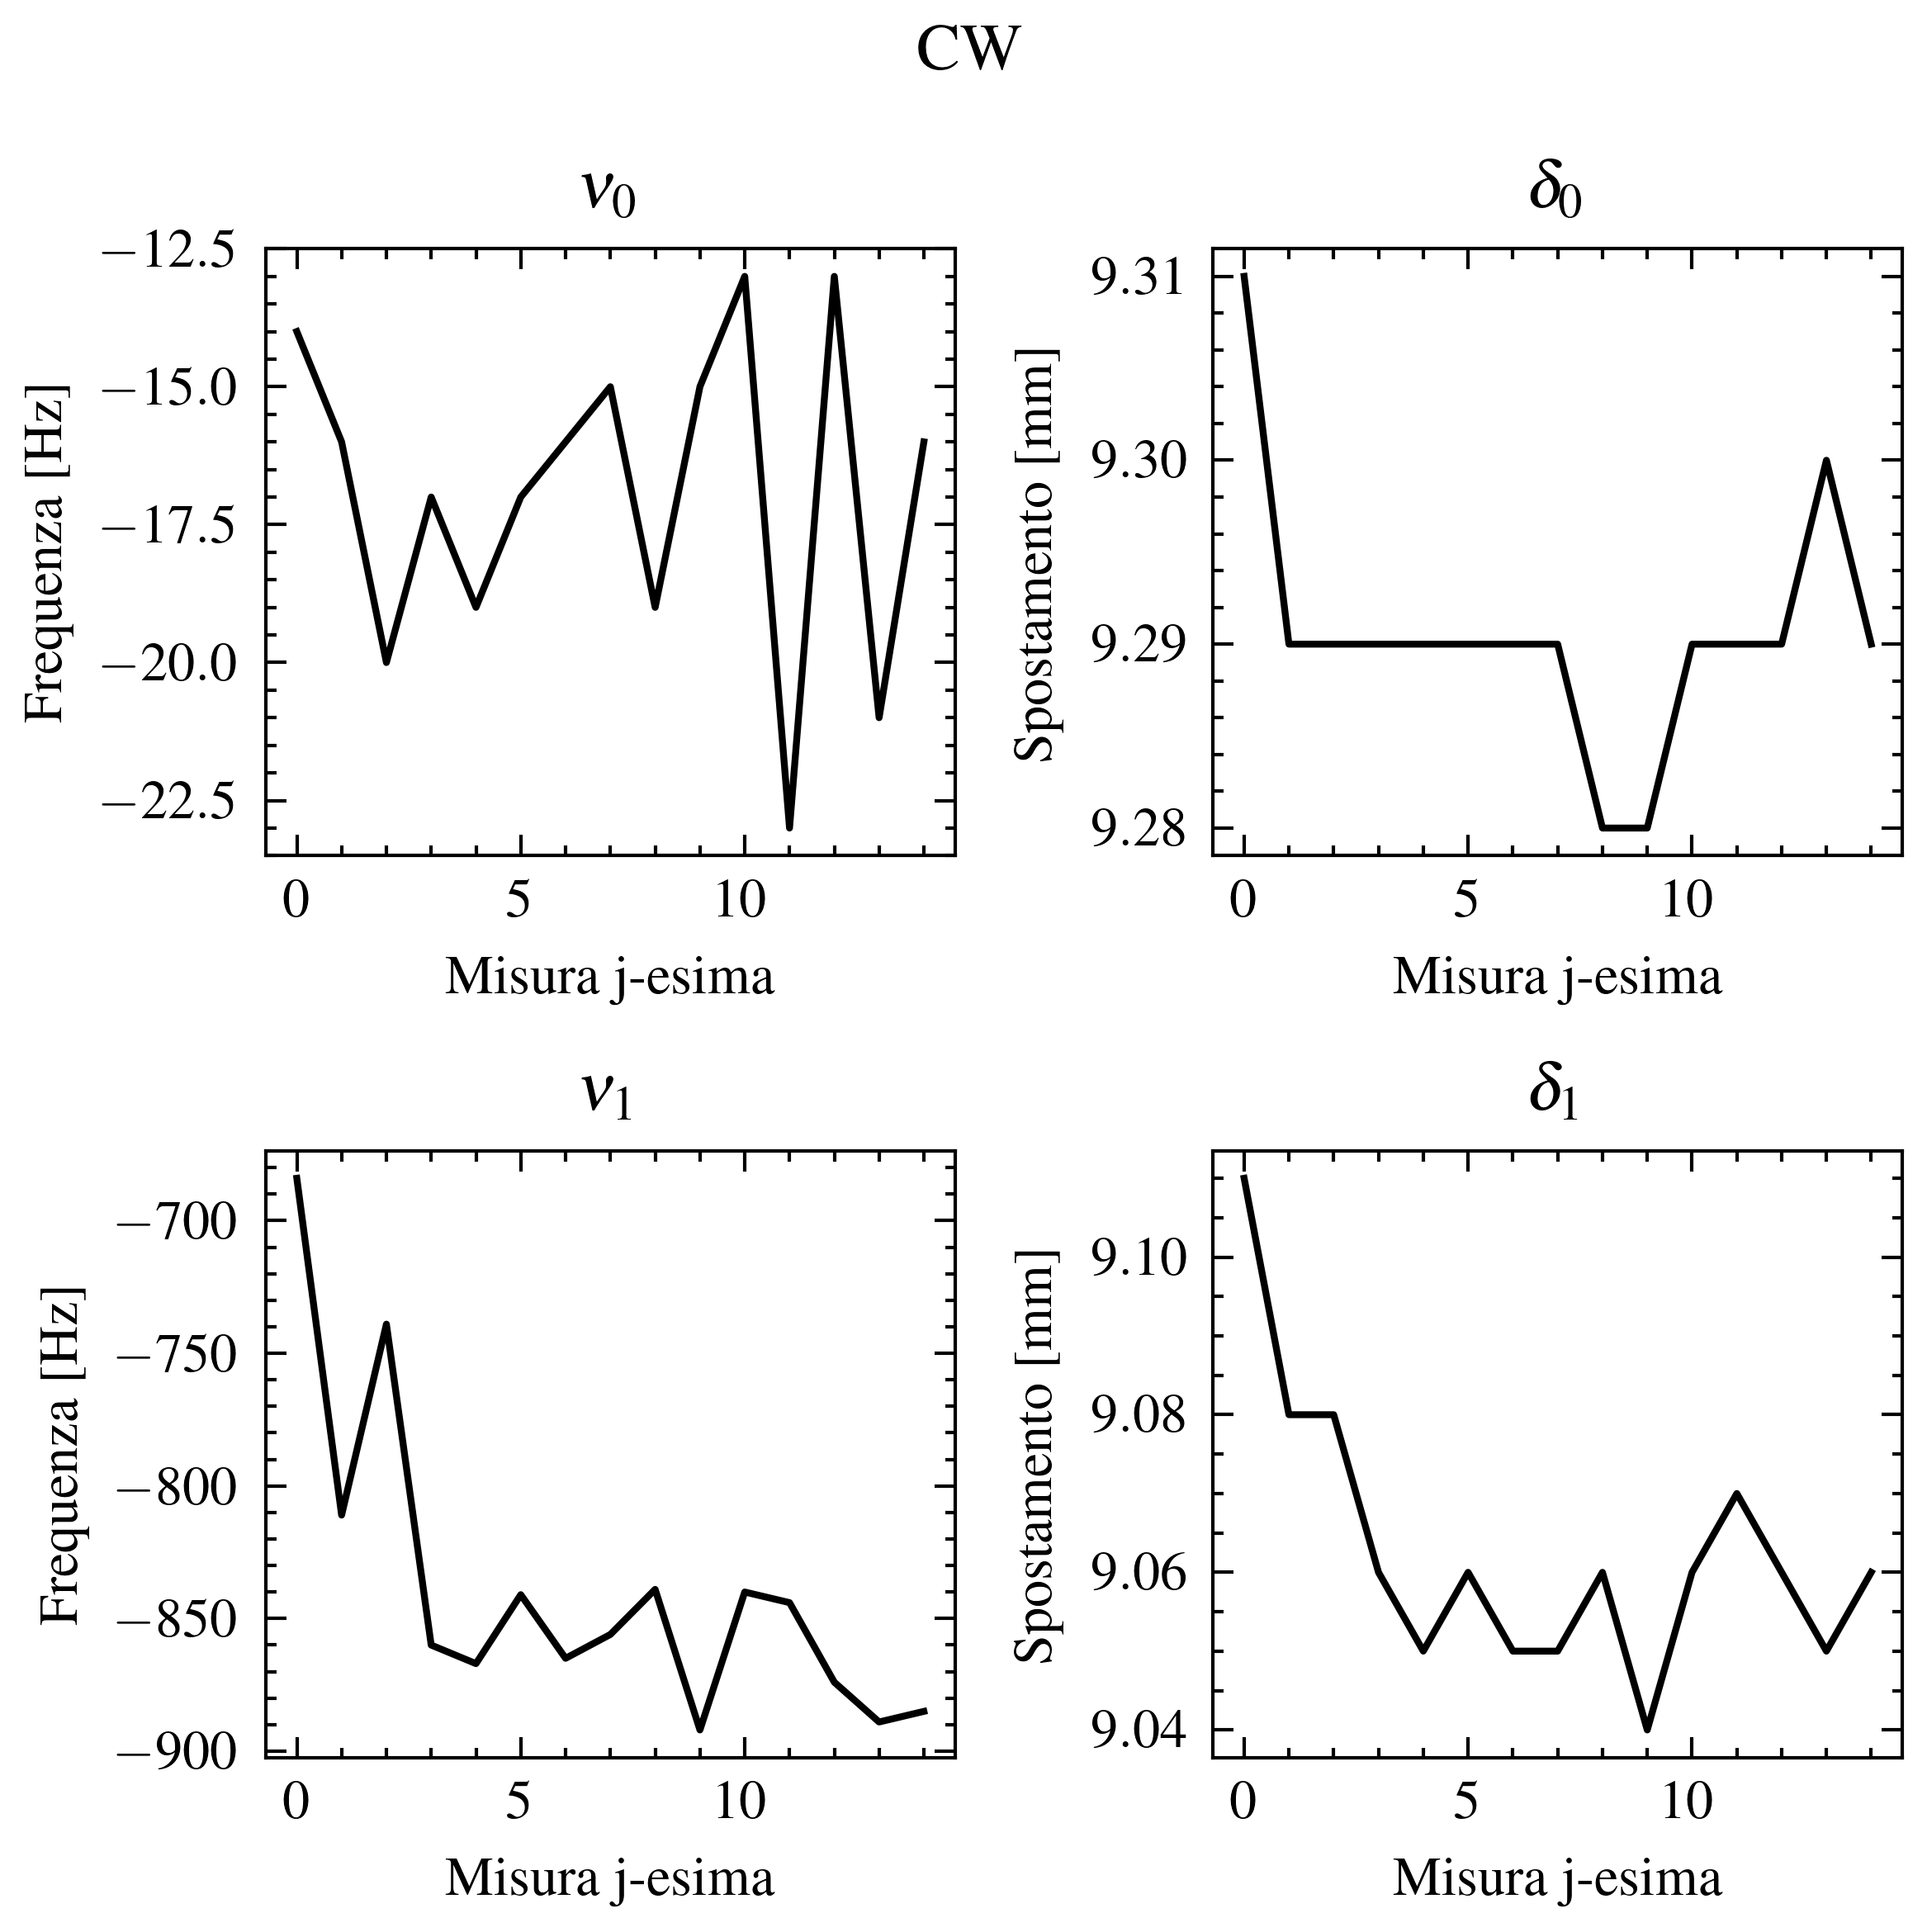

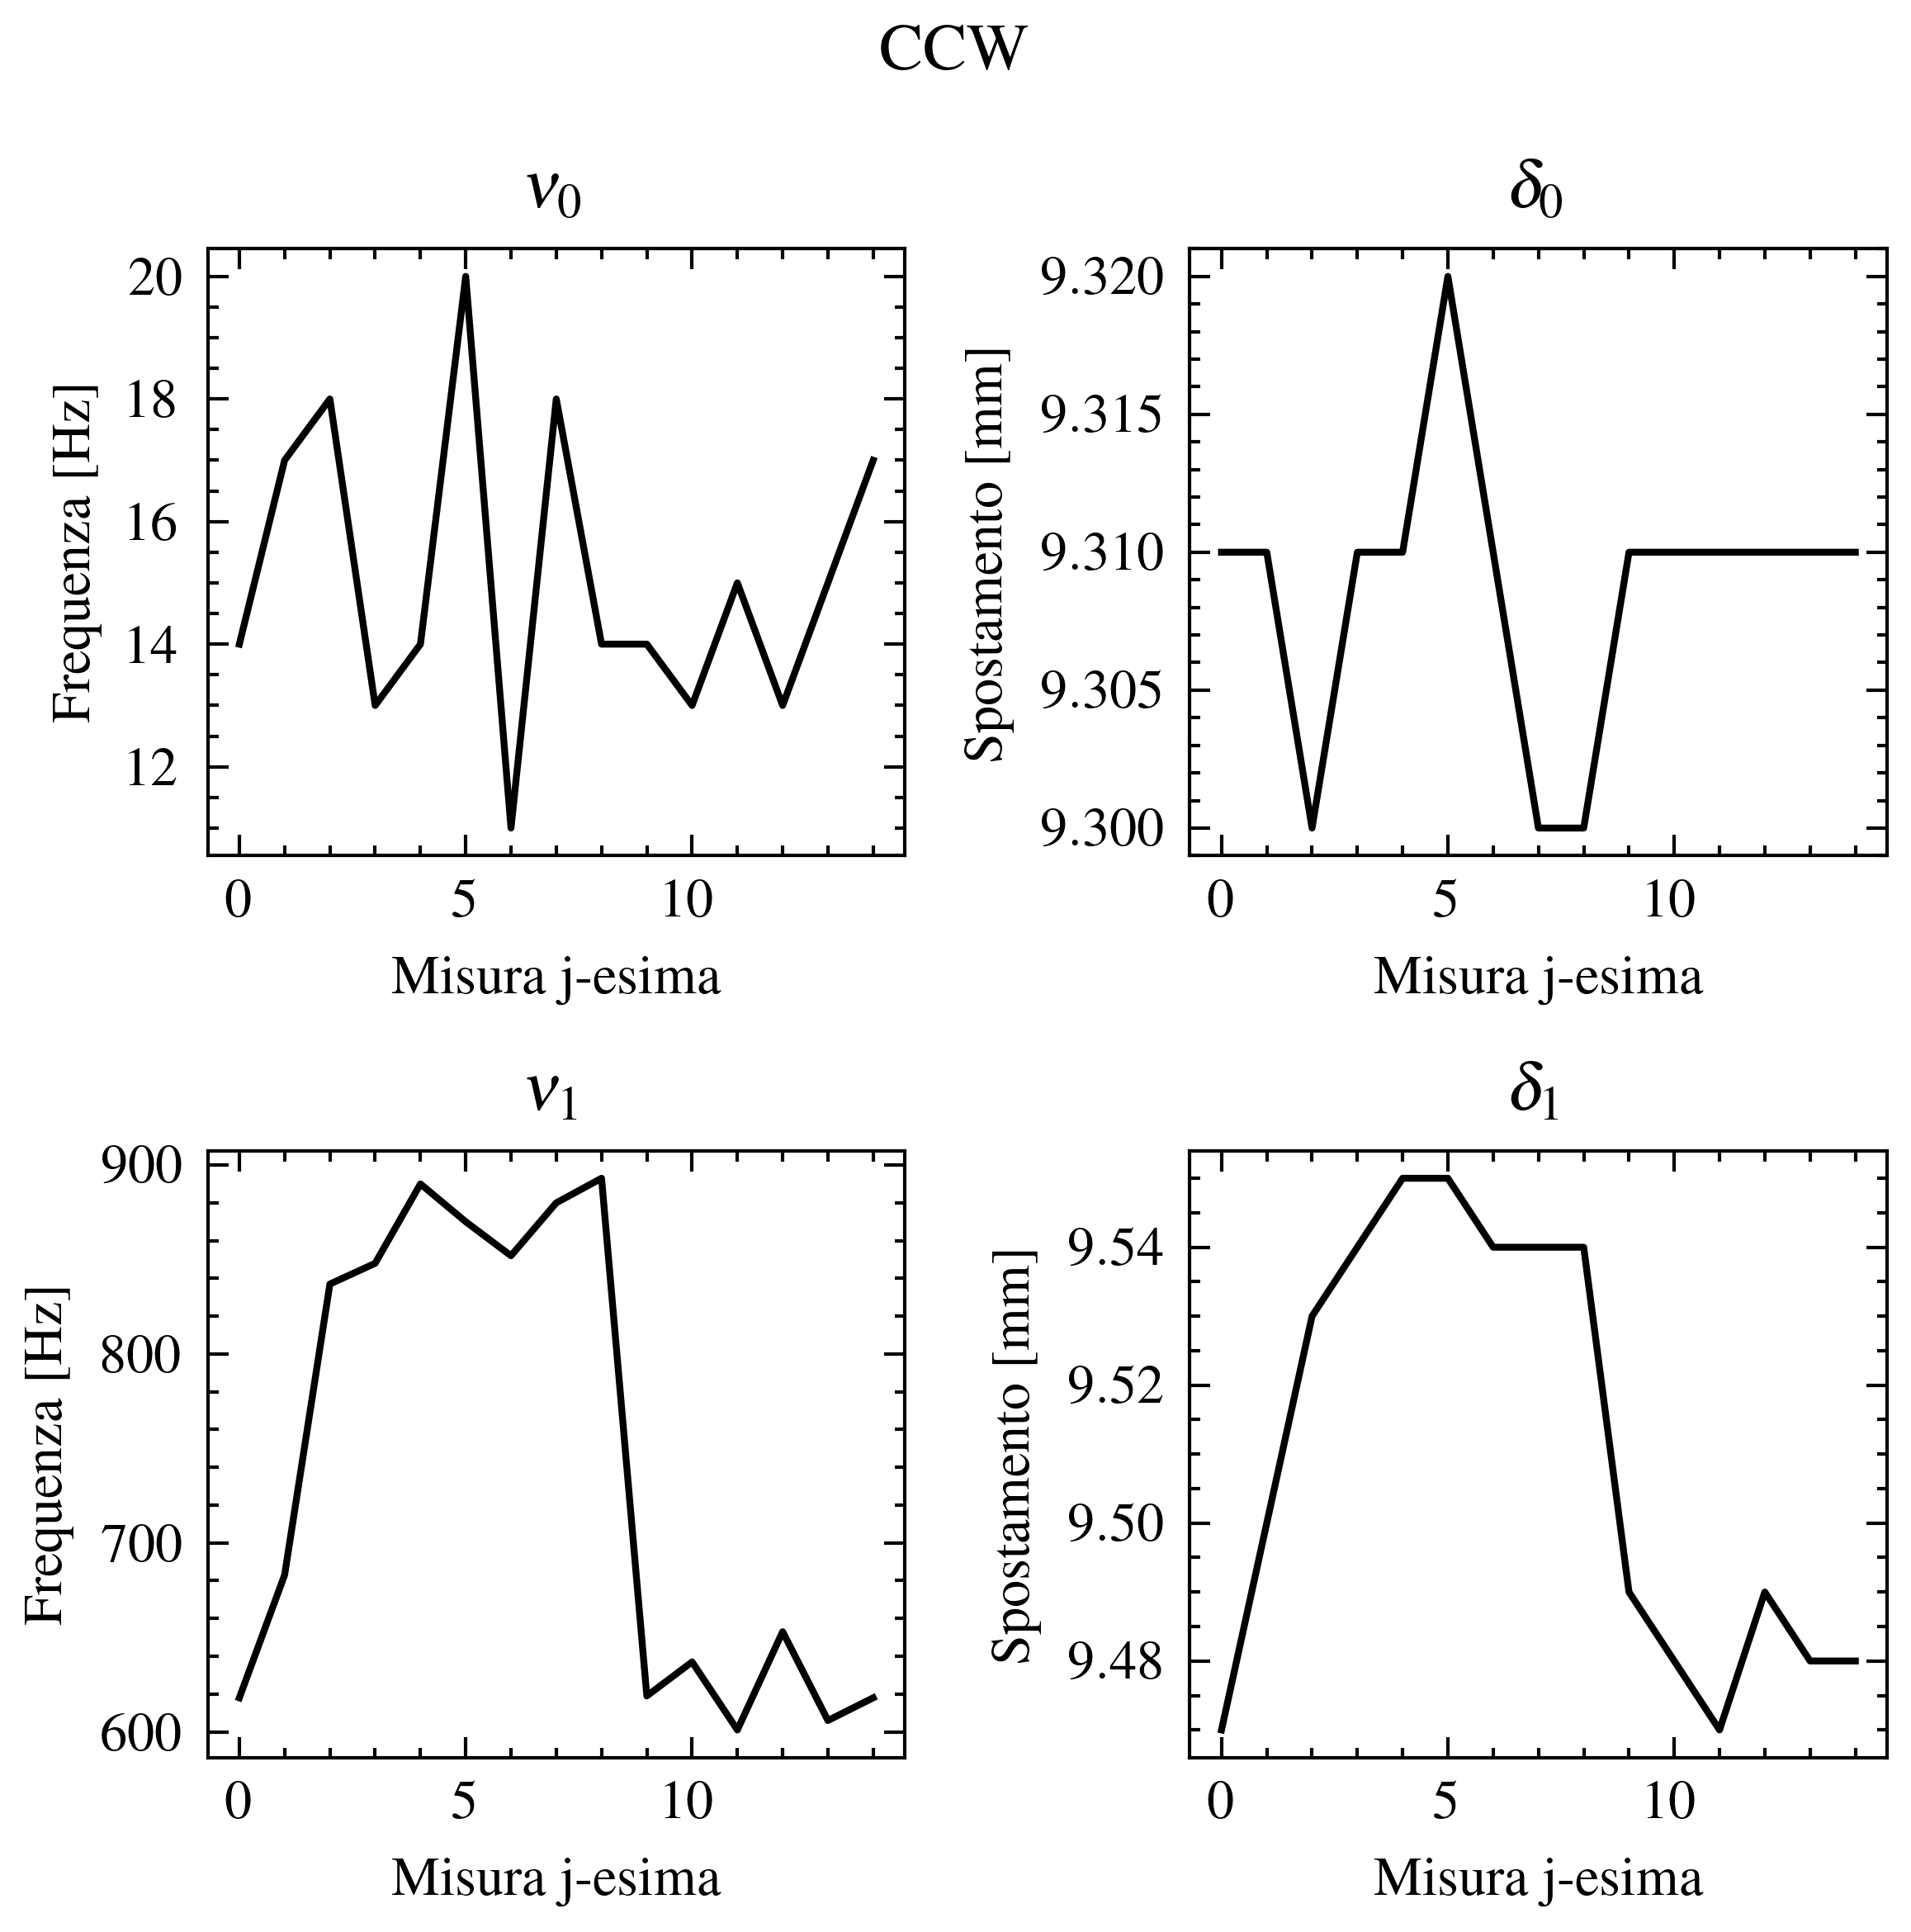

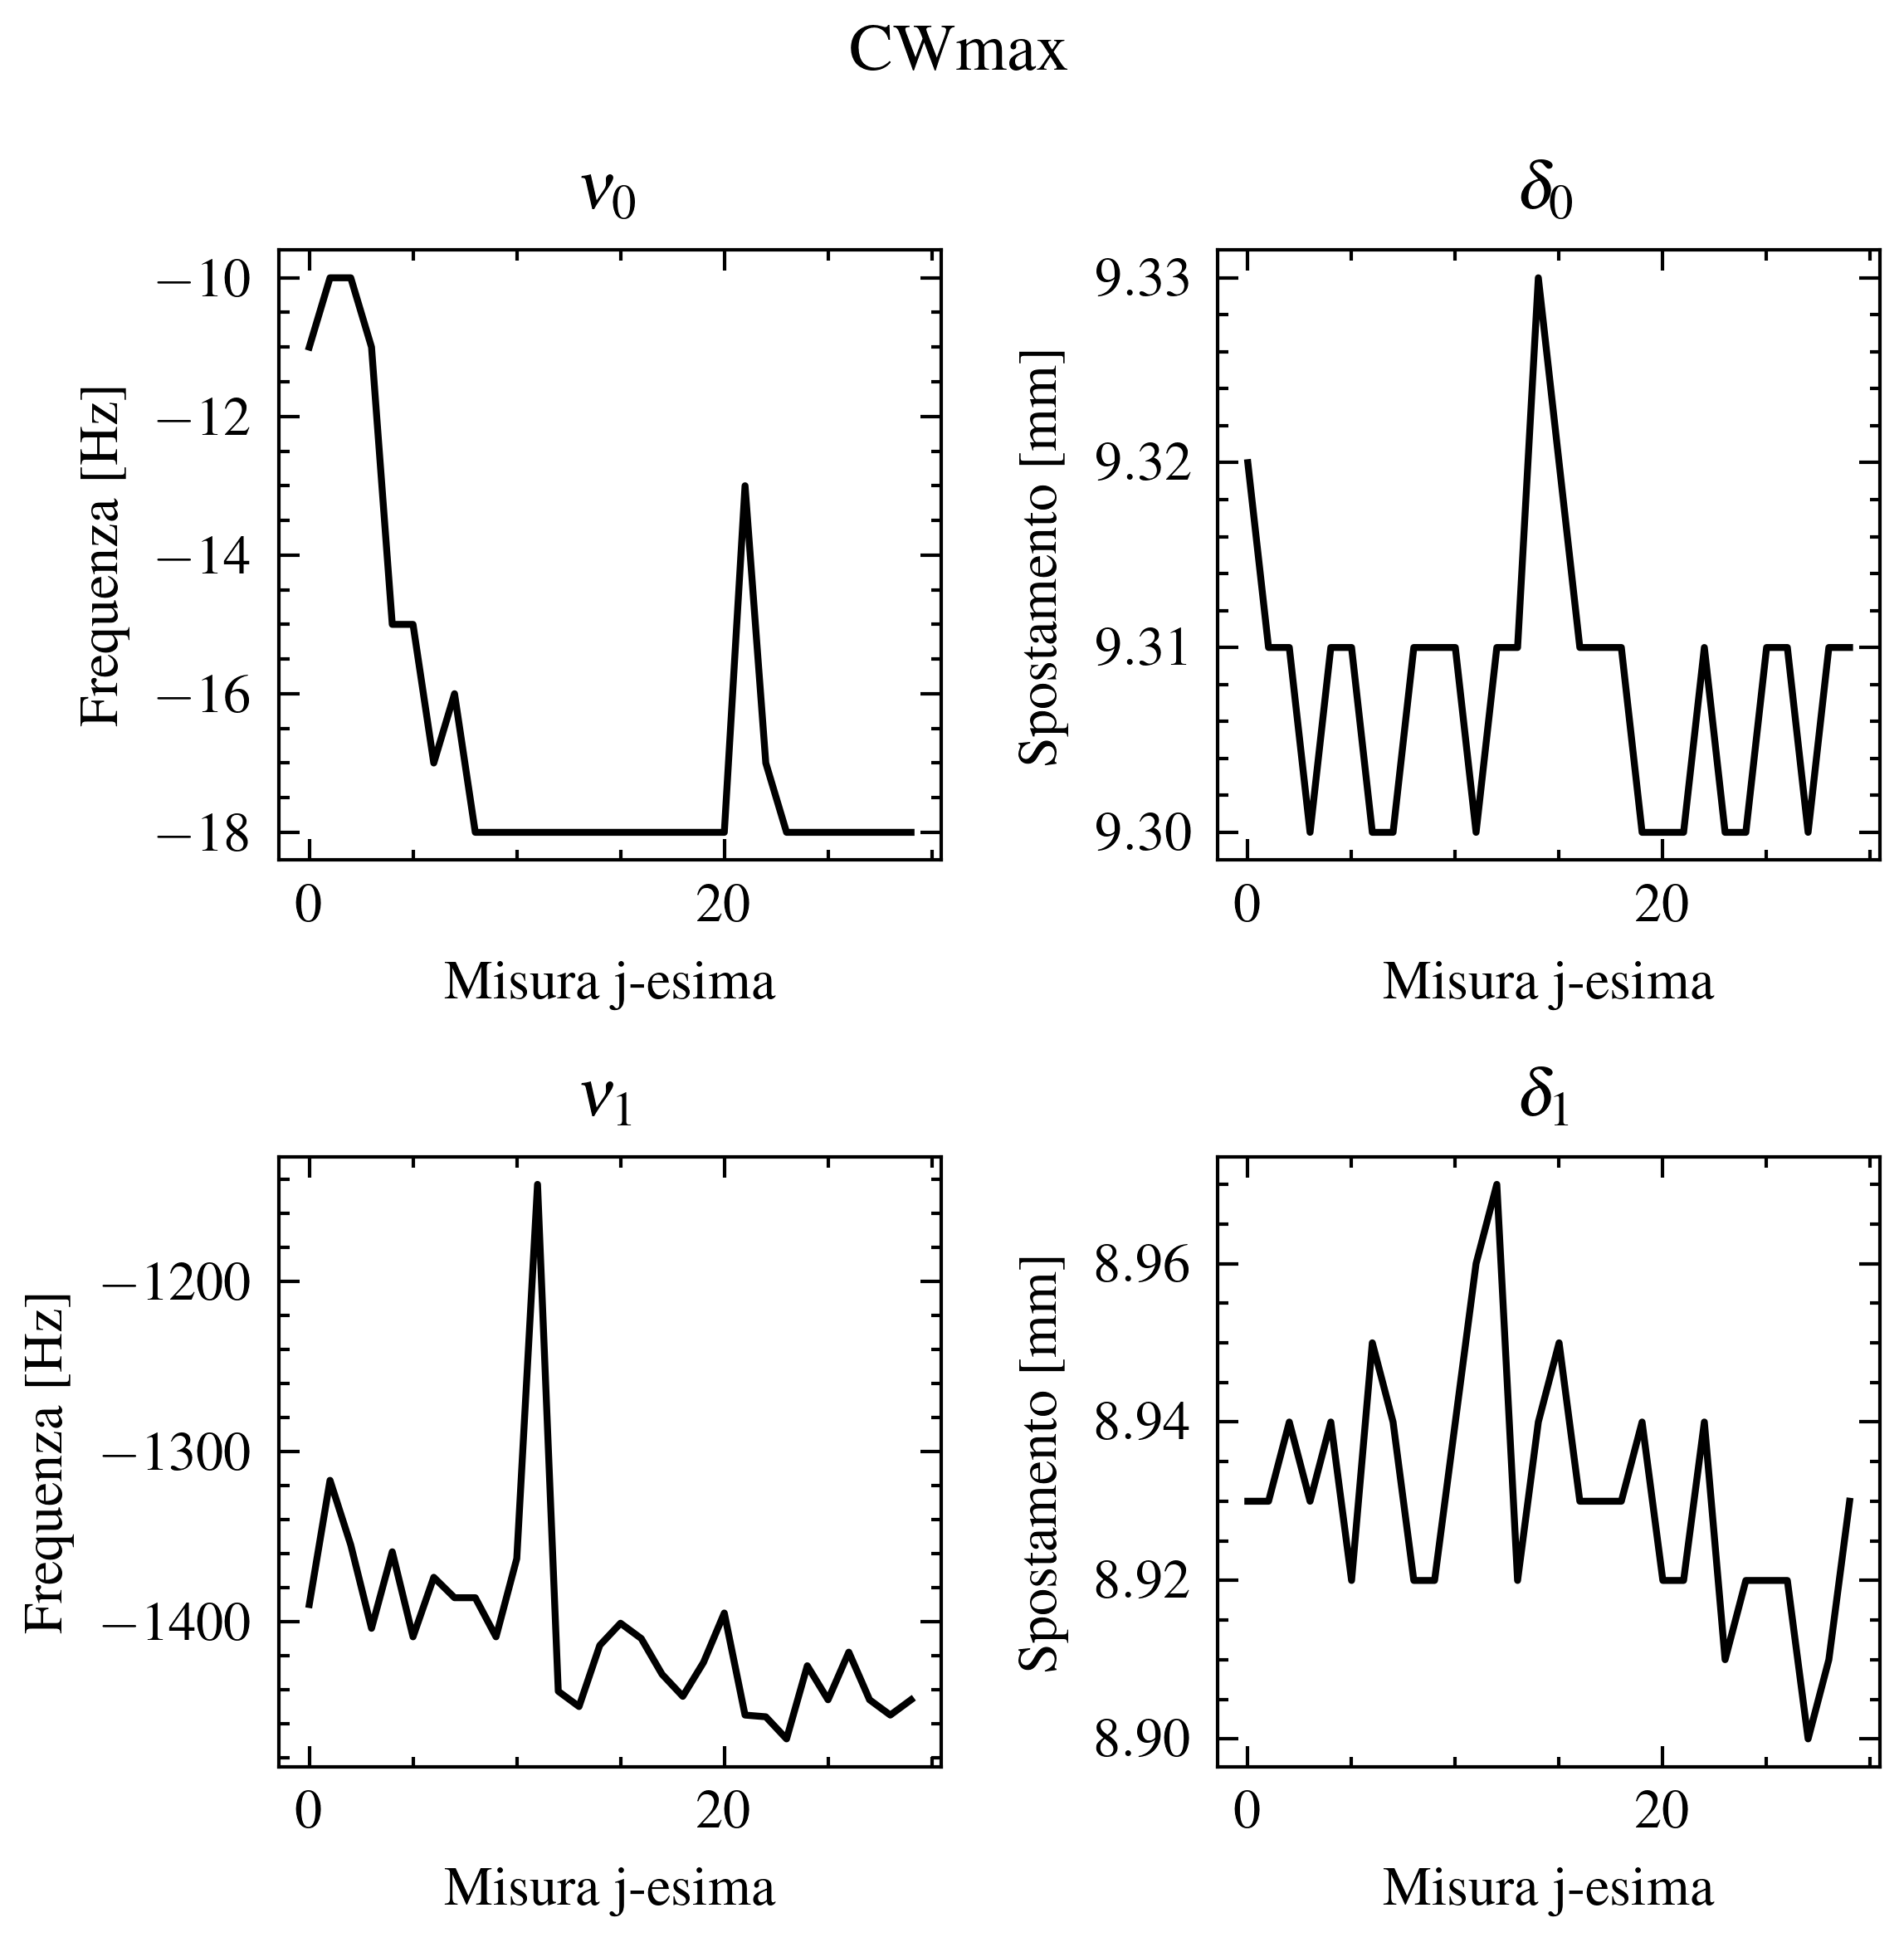

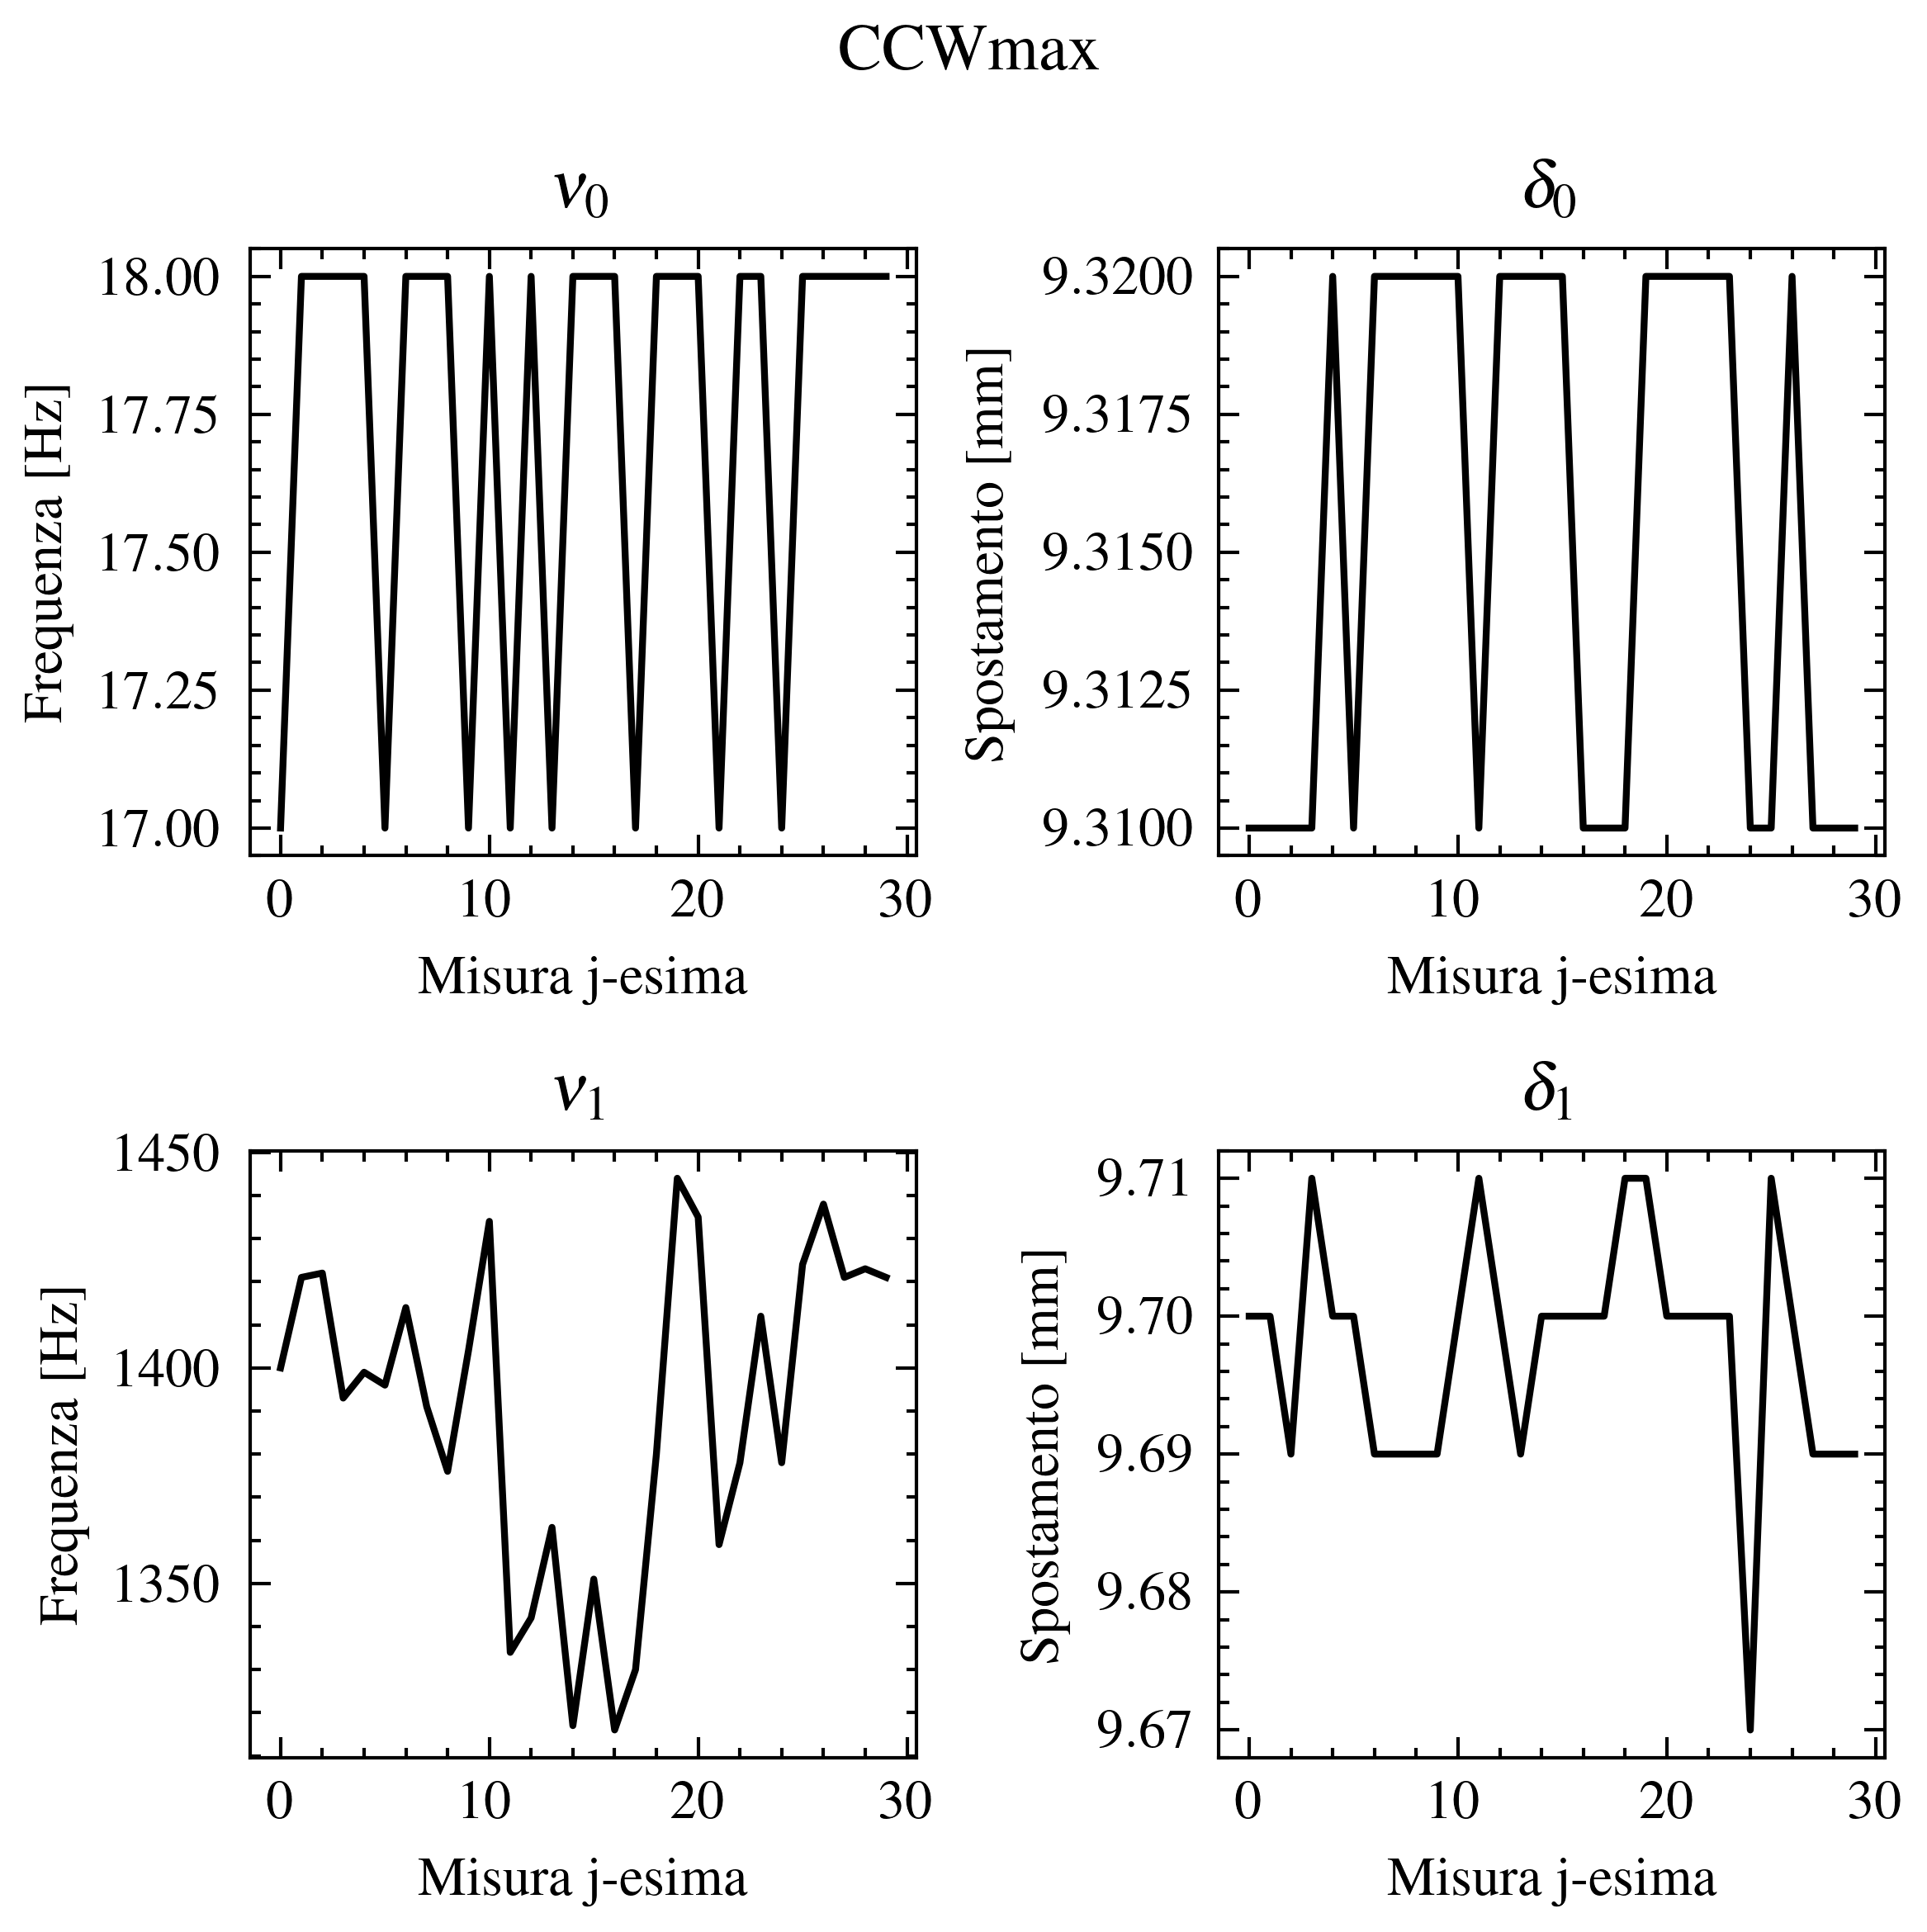

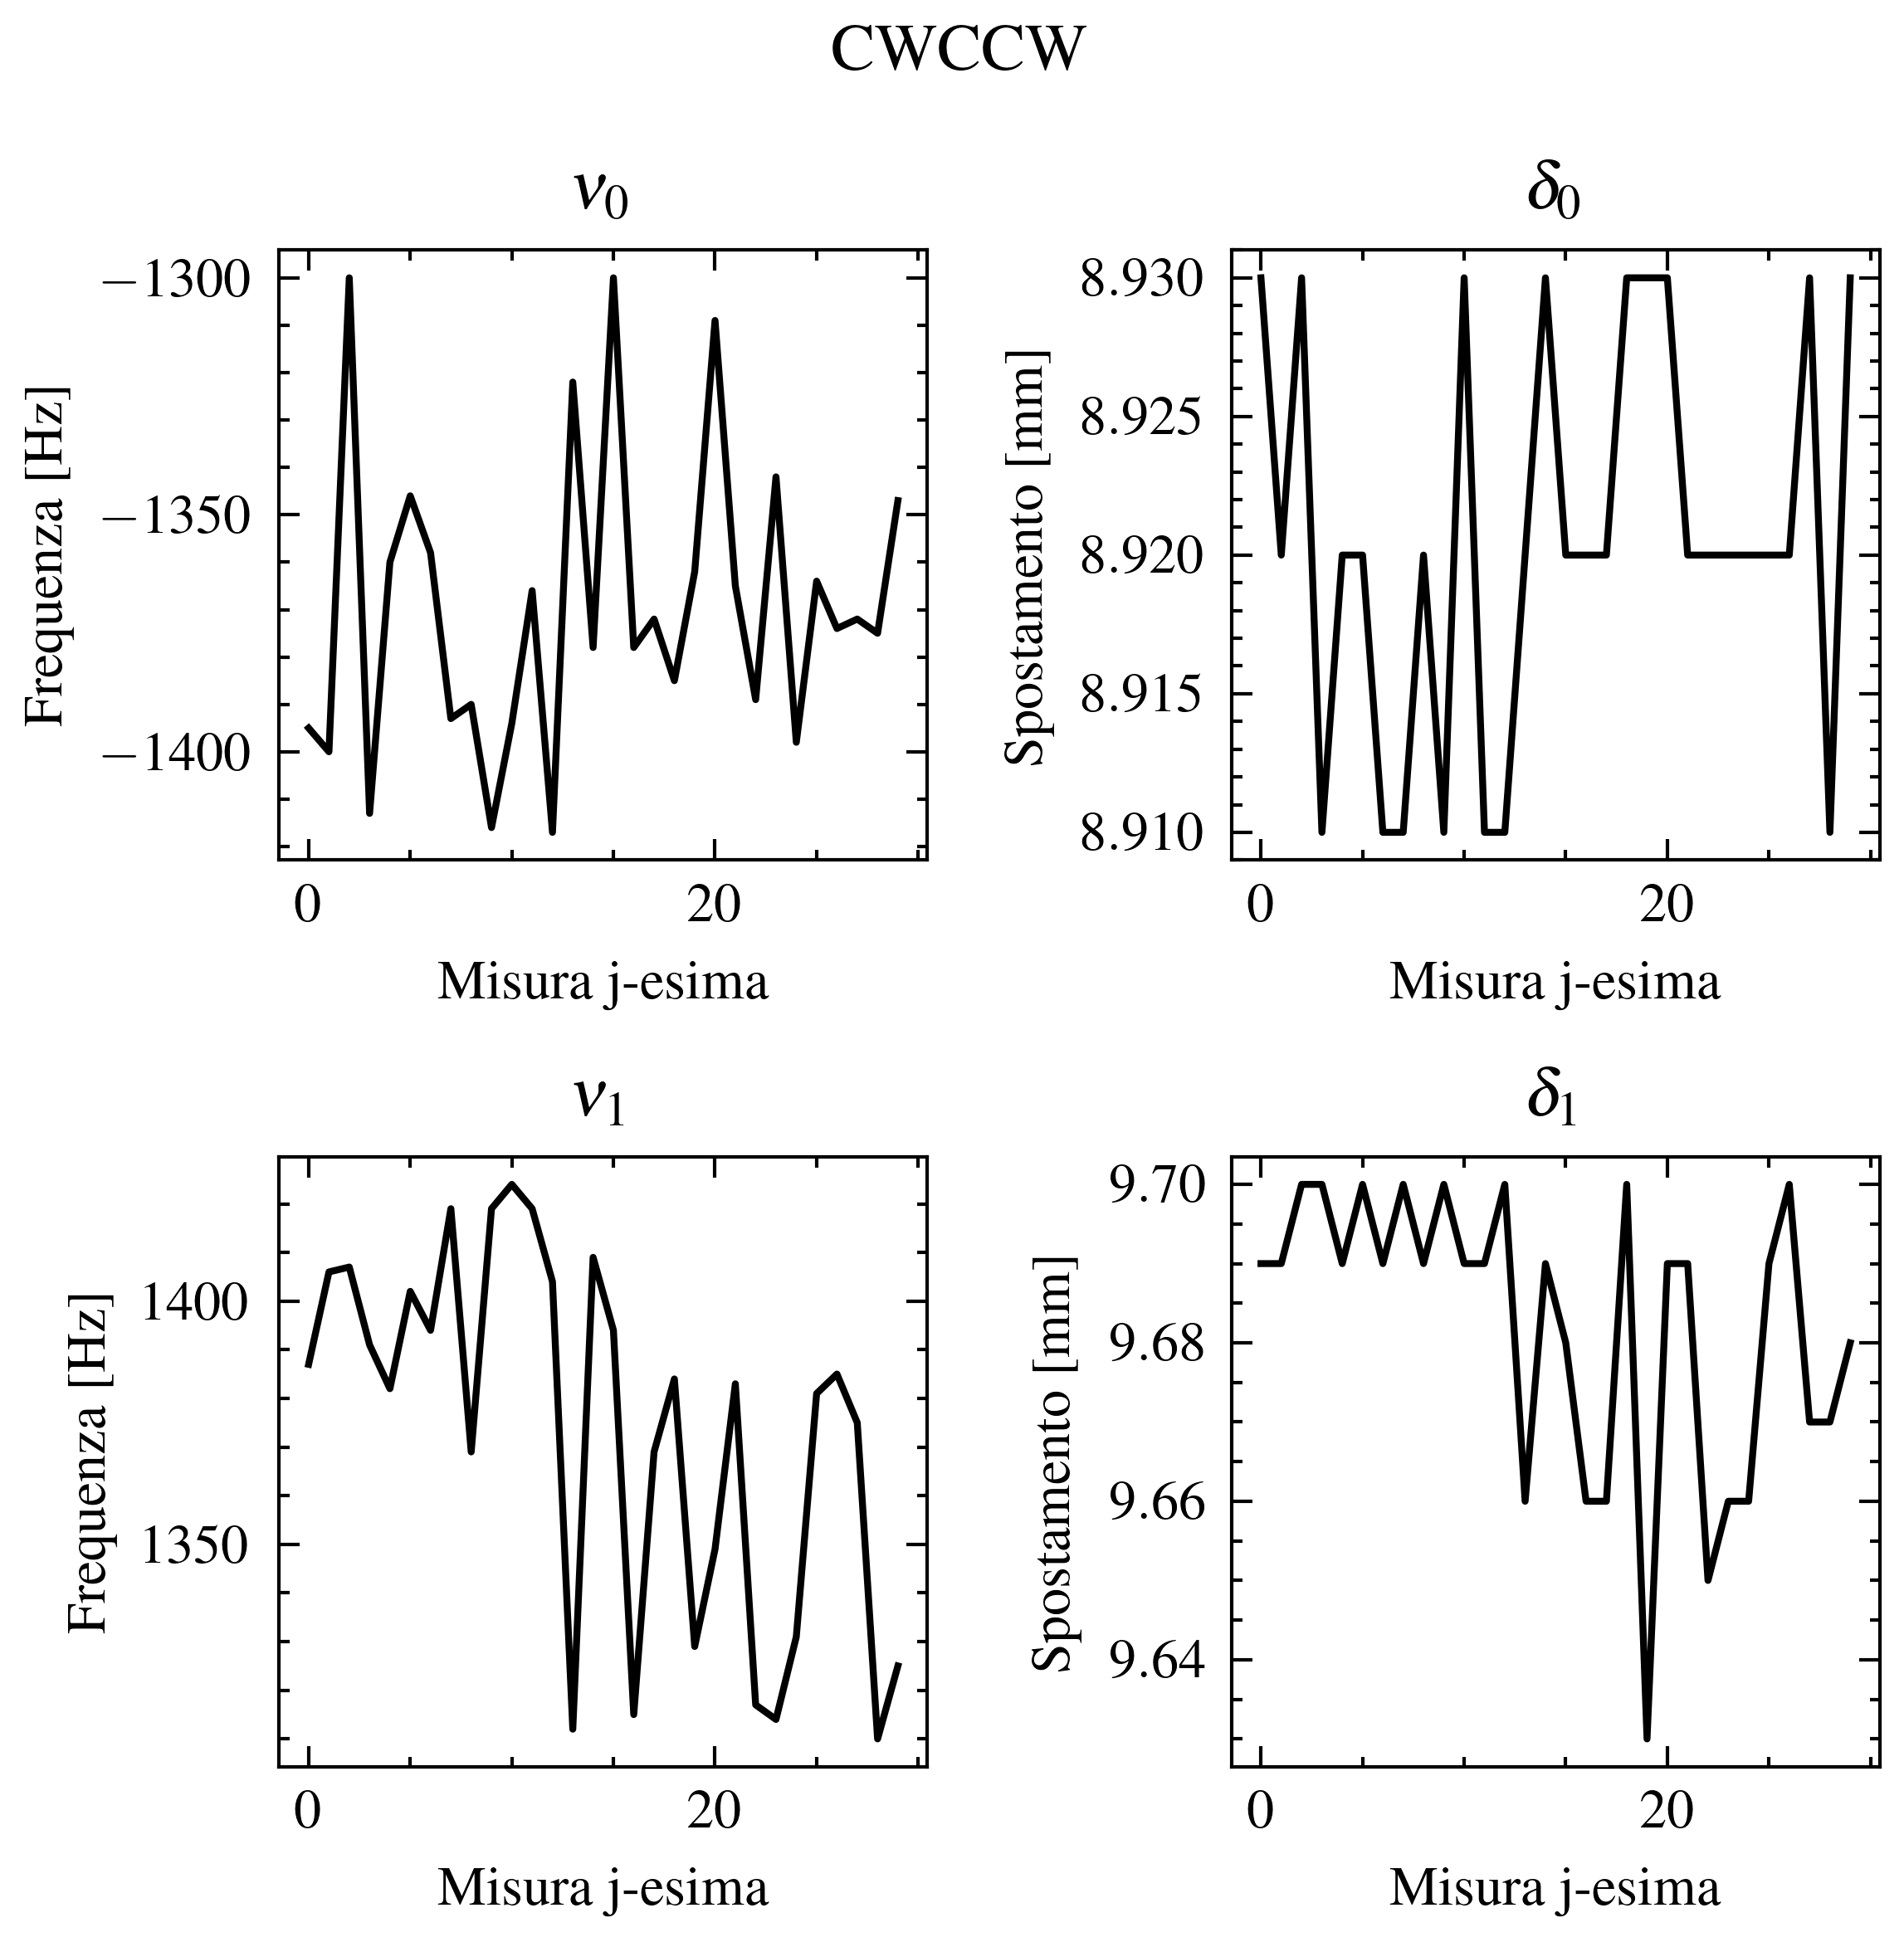

In [5]:
# Example titles and y-axis labels for each subplot
plot_titles = [r"$\nu_0$", r"$\delta_0$", r"$\nu_1$", r"$\delta_1$"]
y_labels = ["Frequenza [Hz]", "Spostamento [mm]", "Frequenza [Hz]", "Spostamento [mm]"]

for set_name, set_data in data_dict.items():
    fig, axs = plt.subplots(2, 2, figsize=(4, 4))
    fig.suptitle(set_name)
    for i in range(4):
        row, col = divmod(i, 2)
        axs[row, col].plot(set_data[i, :])
        axs[row, col].set_title(plot_titles[i])
        axs[row, col].set_xlabel("Misura j-esima")
        axs[row, col].set_ylabel(y_labels[i])

    plt.tight_layout()  # rect=[0, 0, 1, 0.95]
    plt.show()

## Analisi Statistica

`d<x>` è la differenza di `x`, che può essere: `v` per la frequenza, `w` per la velocità angolare, `d` per il $\delta$ (lo spostamento misurato col microscopio). 

In [6]:
c_means, c_errs = list(), list()

for set_name, set_data in data_dict.items():
    dv = set_data[2, :] - set_data[0, :]
    dd = (set_data[3, :] - set_data[1, :]) / 1000  # convert to meters
    dw = dv * 2 * np.pi

    # questo sarebbe da spostare su dove grafichiamo i dati se non printiamo direttamente tutto prima
    print(Style.BRIGHT + Fore.GREEN + f" ~~~~~ {set_name}" + Style.RESET_ALL)
    print("differenze di " + Style.BRIGHT + "frequenza" + Style.NORMAL + ": ", dv)
    print(
        "differenze di " + Style.BRIGHT + "velocità angolare" + Style.NORMAL + ": ", dw
    )
    print("differenze di " + Style.BRIGHT + "spostamento" + Style.NORMAL + ": ", dd)

    c = 4 * f2 * D**2 / (D + a - f2) * dw / dd
    print(
        Style.BRIGHT + "velocità della luce" + Style.NORMAL + " nell'aria misurate: ", c
    )

    mean_c = c.mean()

    # * errore casuale
    std_c = c.std(ddof=1) / np.sqrt(c.size)
    # * errore sistematico
    dd_mean = dd.mean()
    dw_mean = dw.mean()
    alpha = 1 / abs((D + a - f2) ** 2 * dd_mean)
    e_sist = alpha * np.sqrt(
        np.square(-a_err)  # errore dovuto ad a
        + np.square(4 * D**2 * dw_mean * (D + a) * f2_err)  # errore dovuto a f2
        + np.square(
            4 * f2 * D * dw_mean * (D + 2 * a - 2 * f2) * D_err
        )  # errore dovuto a D
    )

    # * real error
    c_err = np.sqrt(np.square(std_c) + np.square(e_sist))

    c_means.append(mean_c)
    c_errs.append(c_err)
    print(
        "Miglior valore di c: "
        + Fore.CYAN
        + Style.BRIGHT
        + f"{mean_c:.6g} ±{c_err:.5g}"
    )

 ~~~~~ CW
differenze di frequenza:  [-670. -795. -719. -843. -848. -824. -849. -841. -820. -877. -827. -821.
 -861. -868. -869.]
differenze di velocità angolare:  [-4209.73415581 -4995.13231921 -4517.61023586 -5296.72521395
 -5328.14114049 -5177.34469312 -5334.4243258  -5284.15884334
 -5152.21195189 -5510.3535144  -5196.19424904 -5158.49513719
 -5409.82254948 -5453.80484663 -5460.08803194]
differenze di spostamento:  [-0.0002  -0.00021 -0.00021 -0.00023 -0.00024 -0.00023 -0.00024 -0.00024
 -0.00022 -0.00024 -0.00023 -0.00022 -0.00023 -0.00025 -0.00023]
velocità della luce nell'aria misurate:  [2.76917703e+08 3.12934718e+08 2.83018946e+08 3.02974203e+08
 2.92072403e+08 2.96145603e+08 2.92416828e+08 2.89661428e+08
 3.08103822e+08 3.02060728e+08 2.97223803e+08 3.08479558e+08
 3.09443403e+08 2.87002467e+08 3.12318604e+08]
Miglior valore di c: 2.98052e+08 ±2.8982e+06
 ~~~~~ CCW
differenze di frequenza:  [604. 666. 819. 835. 876. 850. 841. 862. 879. 605. 624. 586. 640. 591.
 601.]
differenze

In [7]:
c_mean, c_std = weighted_avg_and_std(c_means, c_errs)

print(
    Fore.GREEN
    + Style.BRIGHT
    + "Valore finale di c: "
    + Fore.RED
    + f"{c_mean:.6g} ±{c_std:.3g}m/s"
)

na = 1.000283
print(
    Fore.GREEN
    + "Valore finale di c nel vuoto: "
    + Fore.RED
    + f"{c_mean*na:.6g} ±{c_std*na:.3g}m/s"
)

Valore finale di c: 2.98419e+08 ±8.54e+05m/s
Valore finale di c nel vuoto: 2.98503e+08 ±8.54e+05m/s


In [ ]:
# norm-test
p_value = stats.norm.cdf(299_792_458, loc=c_mean, scale=c_std)
# che c_mean sia <= del valore vero (coda singola)

p_value_duble = 2 * (1 - p_value)
# che c_mean NON sia compatibile con il valore vero (doppia coda)

print(f"P-value di c nell'aria: {p_value:.3g}")

P-value di c nell'aria: 0.946
